In [92]:
CANTIDAD_LIEBRES: int = 5000 # 500 liebres
CANTIDAD_ZORROS: int = 1000  # 10 zorros
SEMANAS: int = 500 # 500 semanas
VARIACION_TIEMPO: int = 1 # 1 semana
TASA_NATALIDAD_LIEBRES: int = 0.08 # 8% de nacimientos con alimento y sin depredadores

TASA_MORTALIDAD_LIEBRES: float = 0.0002 # 0.2% de muertes por depredadores
# ENCUENTROS = CANTIDAD_ZORROS * CANTIDAD_LIEBRES
# TASA_MORTALIDAD_LIEBRES: float = CANTIDAD_ZORROS / ENCUENTROS # 0.002 depredadores

TASA_SUPERVIVENCIA_ZORROS: float = 0.2 # 20% sobrevive sin presas
CAPACIDAD_MAXIMA_TERRENO: int = 9000 # 1000 liebres
TIEMPO_INICIAL: int = 1 # 1 semanas
TASA_CRECIMIENTO_X_ENCUENTROS = (TASA_SUPERVIVENCIA_ZORROS * CANTIDAD_ZORROS) / (CANTIDAD_LIEBRES * CANTIDAD_ZORROS) # = 0.2 * 10 / 5000 = 0.0004

In [93]:
def variacion_liebres(
        liebres, 
        zorros,
        tasa_natalidad_liebres,
        tasa_mortalidad_liebres,
        variacion_tiempo,
        capacidad_maxima_terreno
):
    """Calcula la variación de la población de liebres en un tiempo dado"""
    tasa_liebres = (1/capacidad_maxima_terreno) * (capacidad_maxima_terreno - liebres) * tasa_natalidad_liebres * liebres
    # tasa_liebres = tasa_natalidad_liebres * liebres
    caza = zorros * liebres
    return variacion_tiempo * ( tasa_liebres - (tasa_mortalidad_liebres * caza))

def variacion_zorros(
        liebres, 
        zorros,
        tasa_supervivencia_zorros,
        variacion_tiempo,
        tasa_natalidad_zorros
):
    """Calcula la variación de la población de depredadores en un tiempo dado"""
    supervivencia_zorros = tasa_supervivencia_zorros * zorros # 0.2 * zorros = 2 zorros
    caza = zorros * liebres
    return variacion_tiempo * (tasa_natalidad_zorros * caza - supervivencia_zorros)

In [94]:
import pandas as pd
df = pd.DataFrame(columns=['poblacion_libres', 'poblacion_zorros', 'tiempo_semanas'])
df = pd.concat([df, pd.DataFrame([[CANTIDAD_LIEBRES, CANTIDAD_ZORROS, 1]], columns=['poblacion_libres', 'poblacion_zorros', 'tiempo_semanas'])])
df

,poblacion_libres,poblacion_zorros,tiempo_semanas
0,5000,1000,1


In [95]:

def simular_caza():
    global df

    tiempo = TIEMPO_INICIAL
    liebres = CANTIDAD_LIEBRES
    zorros = CANTIDAD_ZORROS

    for i in range(SEMANAS - 1):
        tiempo = tiempo + VARIACION_TIEMPO
        liebres += variacion_liebres(
            liebres=liebres,
            zorros=zorros,
            tasa_natalidad_liebres=TASA_NATALIDAD_LIEBRES,
            tasa_mortalidad_liebres=TASA_MORTALIDAD_LIEBRES,
            variacion_tiempo=VARIACION_TIEMPO,
            capacidad_maxima_terreno=CAPACIDAD_MAXIMA_TERRENO
        )
        zorros += variacion_zorros(
            liebres=liebres,
            zorros=zorros,
            tasa_supervivencia_zorros=TASA_SUPERVIVENCIA_ZORROS,
            variacion_tiempo=VARIACION_TIEMPO,
            tasa_natalidad_zorros=TASA_CRECIMIENTO_X_ENCUENTROS
        )

        df = pd.concat([df, pd.DataFrame([[liebres, zorros, tiempo]], columns=['poblacion_libres', 'poblacion_zorros', 'tiempo_semanas'])])

simular_caza()

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 0
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   poblacion_libres  500 non-null    object
 1   poblacion_zorros  500 non-null    object
 2   tiempo_semanas    500 non-null    object
dtypes: object(3)
memory usage: 15.6+ KB


In [97]:
df.head()

,poblacion_libres,poblacion_zorros,tiempo_semanas
0,5000,1000,1
0,4177.777778,967.111111,2
0,3548.779808,910.971464,3
0,3074.169537,840.7964,4
0,2719.148357,764.087126,5


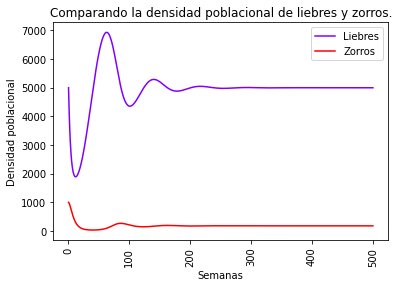

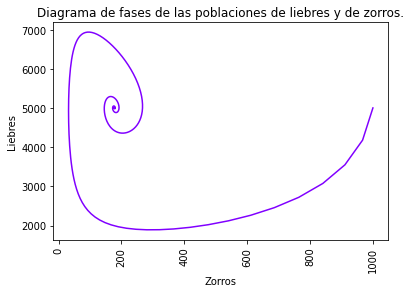

In [98]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Grafica 1
plt.close()
colors = cm.rainbow(np.linspace(0, 1, 2))

plt.plot(df['tiempo_semanas'],
         df['poblacion_libres'],
         c=colors[0],
         label="Liebres")
plt.plot(df['tiempo_semanas'],
         df['poblacion_zorros'],
         c=colors[1],
         label="Zorros")
plt.title('Comparando la densidad poblacional de liebres y zorros.')
plt.xlabel('Semanas')
plt.xticks(rotation=90)
plt.legend()
plt.ylabel('Densidad poblacional')

plt.show()

# Grafica 2
plt.close()
plt.plot(df['poblacion_zorros'],
         df['poblacion_libres'],
         c=colors[0])
plt.title('Diagrama de fases de las poblaciones de liebres y de zorros.')
plt.xlabel('Zorros')
plt.xticks(rotation=90)
plt.ylabel('Liebres')
plt.show()